In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Dados foram retirados desse link: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [2]:
# salvando o DataFrame na variavel "df"
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
# numero de linhas e colunas nessa DataFrame
df.shape

(2938, 22)

In [4]:
# Vendo 10 linhas de forma aleatoria
df.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1572,Malawi,2013,Developing,56.7,394.0,29,0.01,55.831076,89.0,1,...,89.0,1.96,89.0,6.3,332.922339,16577147.0,6.5,6.4,0.459,10.7
871,Estonia,2010,Developing,75.6,137.0,0,14.97,1802.017593,94.0,0,...,94.0,6.25,94.0,0.1,14638.648200,1331475.0,1.9,2.0,0.833,16.2
1092,Guinea-Bissau,2013,Developing,58.1,279.0,4,0.01,8.200637,87.0,0,...,87.0,6.14,87.0,4.5,61.566347,1681495.0,7.5,7.3,0.415,9.1
2275,Serbia,2005,Developing,73.0,135.0,1,9.60,503.111595,65.0,2,...,98.0,8.70,98.0,0.1,3528.131800,744769.0,2.5,2.6,0.730,13.2
2096,Republic of Korea,2006,Developing,79.4,79.0,2,8.83,0.000000,99.0,28,...,98.0,5.76,98.0,0.1,NaN,NaN,1.5,1.0,NaN,NaN
1108,Guyana,2013,Developing,65.9,218.0,0,7.56,345.904426,98.0,0,...,98.0,5.10,98.0,0.3,3944.178173,75881.0,5.5,5.3,0.633,10.3
1148,Honduras,2005,Developing,72.5,163.0,5,3.23,203.713488,97.0,0,...,98.0,7.81,98.0,0.9,1311.741714,737343.0,2.5,2.4,0.577,10.6
2199,Saint Vincent and the Grenadines,2000,Developing,79.0,186.0,0,4.80,0.000000,NaN,0,...,99.0,3.73,98.0,0.7,NaN,NaN,4.0,3.9,0.000,12.7
1318,Japan,2011,Developed,82.5,64.0,3,7.39,9498.729062,NaN,434,...,96.0,1.70,97.0,0.1,48167.997270,127833.0,1.9,1.6,0.884,15.1
1279,Israel,2002,Developing,79.3,74.0,1,2.47,1701.195787,98.0,2,...,91.0,7.49,9.0,0.1,18431.156960,657.0,1.1,1.1,0.855,15.3


In [5]:
# Lista de quantos NaN tem em cada coluna
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
# Removendo as linhas onde "Life Expectancy " é "NaN" no próprio DataFrame, 
# pois a tabela é sobre expectativa de vida ou seja, não faz sentido ter linhas sem essa informação.
# A pessoa que criou essa DataFrame deixou um espaço no final do nome da coluna ficando "Life expectancy "
df.dropna(subset=['Life expectancy '], inplace=True)

In [7]:
# Verificando se foi retirado todos os NaN da coluna
df['Life expectancy '].isna().any()

False

In [8]:
# Quantos paises tem no DataFrame 
df['Country'].nunique()

183

In [9]:
# O ano que foi iniciado essa essa coletagem de dados
df['Year'].min()

2000

In [10]:
# Até que ano foi coletagem de dados
df['Year'].max()

2015

# Foi perguntado ao ChatGPT para fazer perguntas sobre o DataFrame  e essas foi as perguntas:

# Analise a expectativa de vida ao longo dos anos para diferentes países. Há uma melhoria consistente ao longo do tempo? Existem anos ou períodos de tempo específicos que mostram mudanças significativas?

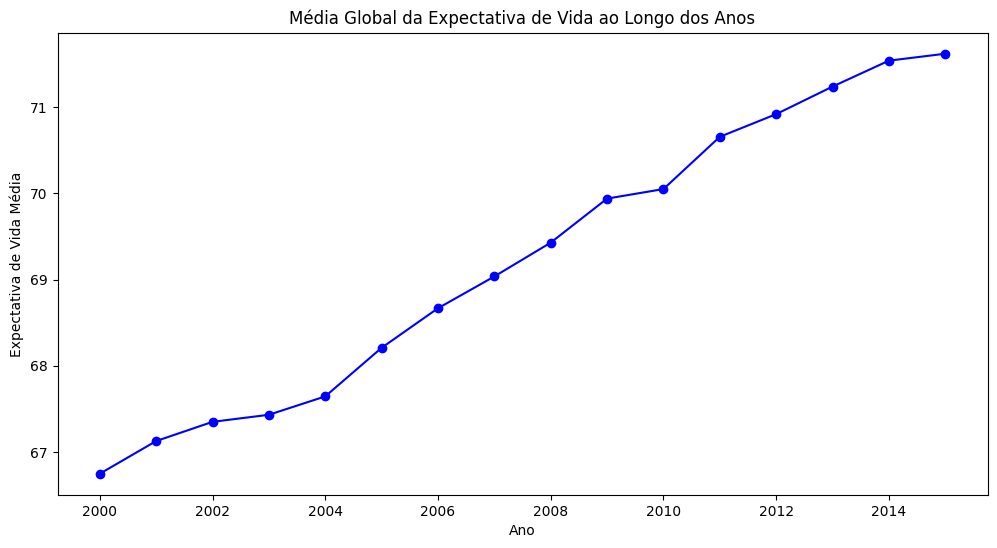

In [11]:
# Calcular a média global por ano
media_global_por_ano = df.groupby('Year')['Life expectancy '].mean()

# Criar um gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(media_global_por_ano, marker='o', linestyle='-', color='blue')
plt.title('Média Global da Expectativa de Vida ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida Média')
plt.show()

In [12]:
# Configurar o pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Crie a tabela
df.groupby(['Year', 'Country'])['Life expectancy '].mean().unstack()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Cyprus,Czechia,Côte d'Ivoire,Democratic People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Micronesia (Federated States of),Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Romania,Russian Federation,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav republic of Macedonia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,54.8,72.6,71.3,45.3,73.6,74.1,72.0,79.5,78.1,66.6,72.6,74.5,65.3,73.3,68.0,77.6,68.3,55.4,62.0,62.6,74.6,47.8,75.0,74.4,71.1,51.0,58.0,69.9,57.7,51.4,79.1,46.0,47.6,77.3,71.7,71.4,59.5,52.9,77.6,74.7,76.9,78.1,74.7,47.9,65.4,51.3,76.9,57.4,72.0,72.8,68.8,69.0,52.7,45.3,78.0,51.2,67.7,77.5,78.8,61.0,55.9,71.8,78.0,57.2,78.2,74.0,67.7,52.5,52.1,65.4,58.6,71.0,71.7,79.7,62.5,66.3,73.0,70.0,76.4,78.9,79.4,72.6,81.1,71.7,63.9,51.9,64.1,73.2,66.6,58.1,71.0,72.7,49.3,51.9,78.0,71.6,77.8,57.9,43.1,72.4,69.6,49.8,77.5,60.0,71.0,74.8,67.0,62.8,73.0,68.6,49.0,62.1,57.4,62.5,78.1,78.6,73.0,50.0,47.1,78.5,72.6,62.8,75.7,58.9,79.0,71.4,66.8,73.7,76.6,76.2,76.0,67.1,77.0,65.0,48.3,71.6,79.0,72.0,62.6,72.6,57.5,72.6,71.8,39.0,78.3,73.0,76.0,65.8,55.0,57.3,48.9,79.1,71.5,58.6,67.4,48.4,79.6,79.7,72.6,63.7,71.1,72.6,58.7,54.6,71.6,69.1,72.9,74.0,63.8,46.6,67.5,74.2,77.8,49.2,76.8,75.1,67.1,69.0,72.5,73.4,68.0,43.8,46.0
2001,55.3,73.6,71.4,45.7,73.8,74.0,72.6,79.9,78.6,67.5,72.9,74.7,65.8,73.4,67.7,78.0,68.2,55.5,61.7,63.3,74.9,46.7,71.0,74.7,71.6,56.0,51.3,73.0,58.5,51.5,79.4,45.6,48.0,77.3,72.2,71.5,59.5,52.7,77.5,74.9,76.7,78.2,75.1,47.8,66.6,51.8,77.0,57.7,71.2,73.4,68.6,68.9,53.1,58.1,78.0,52.5,67.8,78.0,79.0,59.8,56.3,73.0,78.3,57.4,78.7,77.0,68.4,52.5,52.5,65.4,58.9,71.3,72.3,80.0,62.9,66.5,78.0,72.0,77.0,79.3,79.8,72.7,81.5,71.9,64.4,51.9,64.3,73.2,67.2,58.7,69.9,73.0,47.8,51.5,71.0,71.2,78.0,58.7,43.5,72.7,78.0,55.0,77.8,61.0,71.5,75.0,67.2,63.2,73.3,69.0,49.5,62.5,56.5,63.2,78.3,78.5,73.0,56.0,47.4,78.8,72.9,63.0,75.5,59.1,71.2,72.4,66.8,74.2,76.9,76.3,76.7,67.6,78.0,65.1,48.6,71.8,79.0,75.0,62.8,72.8,57.9,73.1,72.0,41.0,78.7,73.3,76.2,66.2,57.0,56.0,49.6,79.4,72.7,58.9,67.7,47.1,79.8,82.0,72.7,64.0,71.2,73.1,59.4,54.6,71.8,69.1,73.2,78.0,64.0,47.7,67.7,74.

Conclusão:<br>

SIM, há uma melhora consistente na expectativa de vida de 2000 a 2015 na média global. Apesar de haver alguns países fora do padrão devido a problemas internos, desde a dificuldade de obter esses dados por falta de transparência, doenças, crise, a guerras internas, como o exemplo da Ucrânia, onde em 2014 a Rússia ocupou o estado da Crimeia ilegalmente, causando uma guerra e reduzindo a expectativa de vida de 78 anos em 2014 para 71,3 anos em 2015.

# Compare a expectativa de vida entre diferentes países. Identifique padrões e discrepâncias. Quais países têm as expectativas de vida mais altas ou mais baixas?

In [13]:
# Encontro o país com a maior expectativa de vida para cada ano
indices_max_expectativa = df.groupby('Year')['Life expectancy '].idxmax()

# Mostro apenas as colunas com as informações que preciso
paises_com_maior_expectativa = df.loc[indices_max_expectativa, ['Year', 'Country', 'Life expectancy ']]

# Exibir o resultado
print(paises_com_maior_expectativa)

      Year      Country  Life expectancy 
1329  2000        Japan              81.1
2535  2001  Switzerland              82.0
1183  2002      Iceland              84.0
1182  2003      Iceland              87.0
1293  2004        Italy              89.0
1292  2005        Italy              88.0
2434  2006        Spain              88.0
938   2007       France              89.0
937   2008       France              89.0
1916  2009       Norway              89.0
1850  2010  New Zealand              89.0
132   2011      Austria              88.0
131   2012      Austria              88.0
242   2013      Belgium              87.0
241   2014      Belgium              89.0
2345  2015     Slovenia              88.0


In [14]:
df[df['Country'].isin(['Japan', 'Switzerland', 'iceland', 'Italy', 'Spain', 'France', 'Norway' , 'New Zealand', 'Austria', 'Belgiam', 'Slovenia'])]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
128,Austria,2015,Developed,81.5,65.0,0,NaN,0.000000,93.0,309,57.6,0,93.0,NaN,93.0,0.1,43665.94700,8633169.0,1.9,2.1,0.892,15.9
129,Austria,2014,Developed,81.4,66.0,0,12.32,8350.193523,98.0,117,57.1,0,98.0,11.21,98.0,0.1,51322.63997,8541575.0,1.8,2.0,0.892,15.9
130,Austria,2013,Developed,81.1,68.0,0,11.82,90.585012,95.0,0,56.6,0,95.0,11.14,95.0,0.1,554.71532,8479375.0,1.8,2.0,0.887,15.7
131,Austria,2012,Developed,88.0,7.0,0,12.26,7878.372355,92.0,36,56.1,0,92.0,11.17,92.0,0.1,48333.57273,8429991.0,1.8,2.0,0.884,15.7
132,Austria,2011,Developed,88.0,73.0,0,12.04,8272.306757,89.0,68,55.7,0,89.0,1.94,89.0,0.1,51126.74139,8391643.0,1.7,2.0,0.880,15.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,Switzerland,2004,Developed,81.0,69.0,0,10.55,9495.540576,NaN,39,52.8,0,95.0,1.96,93.0,0.1,53255.97631,7389625.0,0.6,0.4,0.895,15.1
2533,Switzerland,2003,Developed,85.0,72.0,0,10.82,842.276809,NaN,574,52.3,0,95.0,1.93,93.0,0.1,4796.56497,73391.0,0.6,0.5,0.889,15.0
2534,Switzerland,2002,Developed,84.0,74.0,0,10.85,6853.628494,NaN,0,51.8,0,95.0,1.61,93.0,0.1,41336.72192,7284753.0,0.6,0.5,0.890,15.2
2535,Switzerland,2001,Developed,82.0,75.0,0,11.12,6478.346135,NaN,700,51.3,0,95.0,1.28,93.0,0.1,38538.64447,7229854.0,0.7,0.5,0.888,15.2


In [15]:
# Encontro o país com a maior expectativa de vida para cada ano
indices_min_expectativa = df.groupby('Year')['Life expectancy '].idxmin()

# Mostro apenas as colunas com as informações que preciso
paises_com_menor_expectativa = df.loc[indices_min_expectativa, ['Year', 'Country', 'Life expectancy ']]

# Exibir o resultado
print(paises_com_menor_expectativa)

      Year                   Country  Life expectancy 
2312  2000              Sierra Leone              39.0
2311  2001              Sierra Leone              41.0
1583  2002                    Malawi              44.0
2309  2003              Sierra Leone              41.5
2308  2004              Sierra Leone              42.3
2307  2005              Sierra Leone              43.3
2306  2006              Sierra Leone              44.3
2305  2007              Sierra Leone              45.3
2304  2008              Sierra Leone              46.2
2303  2009              Sierra Leone              47.1
1127  2010                     Haiti              36.3
2301  2011              Sierra Leone              48.9
2300  2012              Sierra Leone              49.7
514   2013  Central African Republic              49.9
2298  2014              Sierra Leone              48.1
2297  2015              Sierra Leone              51.0


In [16]:
df[df['Country'].isin(['Sierra Leone','Malawi','Haiti', 'Central African Republic'])]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
512,Central African Republic,2015,Developing,52.5,397.0,15,NaN,0.000000,47.0,150,22.7,21,47.0,NaN,47.0,4.4,348.381417,45461.0,8.2,8.2,0.347,7.1
513,Central African Republic,2014,Developing,58.0,437.0,15,0.01,53.439643,47.0,210,22.1,22,47.0,4.20,47.0,4.5,377.132274,4515392.0,8.4,8.3,0.345,7.1
514,Central African Republic,2013,Developing,49.9,451.0,16,0.01,52.377666,23.0,596,21.6,23,23.0,3.82,23.0,5.1,337.484961,4499653.0,8.5,8.5,0.370,7.1
515,Central African Republic,2012,Developing,53.0,439.0,16,0.01,7.344808,47.0,141,21.2,23,47.0,3.62,47.0,5.1,486.411140,449416.0,8.7,8.6,0.366,7.1
516,Central African Republic,2011,Developing,49.8,443.0,16,1.66,58.529475,47.0,679,2.7,24,47.0,3.73,47.0,5.8,494.336779,4476153.0,8.8,8.8,0.361,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,Sierra Leone,2004,Developing,42.3,496.0,30,3.99,38.524548,NaN,7,18.8,47,69.0,11.66,65.0,2.1,263.145817,5439695.0,9.5,9.5,0.332,7.6
2309,Sierra Leone,2003,Developing,41.5,57.0,30,4.07,38.614732,NaN,586,18.4,47,66.0,11.69,73.0,1.9,263.761831,5199549.0,9.7,9.8,0.322,7.4
2310,Sierra Leone,2002,Developing,48.0,513.0,30,4.06,36.591149,NaN,568,17.9,48,54.0,11.96,53.0,1.7,249.939542,4957216.0,9.9,1.0,0.306,7.2
2311,Sierra Leone,2001,Developing,41.0,519.0,30,4.21,33.346915,NaN,649,17.5,48,38.0,11.83,38.0,1.5,227.779471,4739147.0,1.1,1.2,0.302,7.0


Conclusão:<br>

A comparação entre os países mais ricos e os mais pobres revelou algumas discrepâncias e padrões em relação a doenças como Hepatite B, HIV/AIDS, Poliomielite, bem como uma diferença na escolaridade, causando um aumento significativo nas mortes de crianças e adultos.<br>

Percebe-se que o país Serra Leoa foi praticamente dominante na lista dos países mais pobres. Ao pesquisar mais a fundo, descobri que Serra Leoa enfrentou um longo período de guerra civil entre 1991 e 2002, o que teve consequências devastadoras para a população.<br>

Concluindo, a maior parte das expectativas de vida mais baixas é causada pela má gestão de seus países.

# Analise a expectativa de vida com base no status de desenvolvimento ('Status'). Países desenvolvidos têm expectativas de vida consistentemente mais altas do que os países em desenvolvimento?

In [17]:
# Mostra quantos paises são "Desenvolvidos"(Developing) e "Em Desenvolvimento"(Developed)
df.groupby('Status')['Country'].nunique()

Status
Developed      32
Developing    151
Name: Country, dtype: int64

Conclusão:<br>

O que classifica um pais não é somente a expectativa de vida mais outros fatores como: Produto Interno Bruto (PIB),  Renda per capita,  Índices de Desenvolvimento Humano (IDH), infraestrutura e Qualidade de Vida,  Estabilidade Política e Institucional,  Industrialização e Diversificação Econômica, Acesso à Tecnologia e Comunicação.<br>
Verificando os DataFrame da pergunta anterior é perceptivel que a tabela "Status" que é paises "em desenvolvimento"(Developing) e paises "desenvolvido"(Developed) tem uma diferença no PIB(GDP) e escolariedade(Schooling).

# Analise as taxas de imunização (Hepatitis B, Polio, Diphtheria) e sua relação com a expectativa de vida e mortalidade infantil.

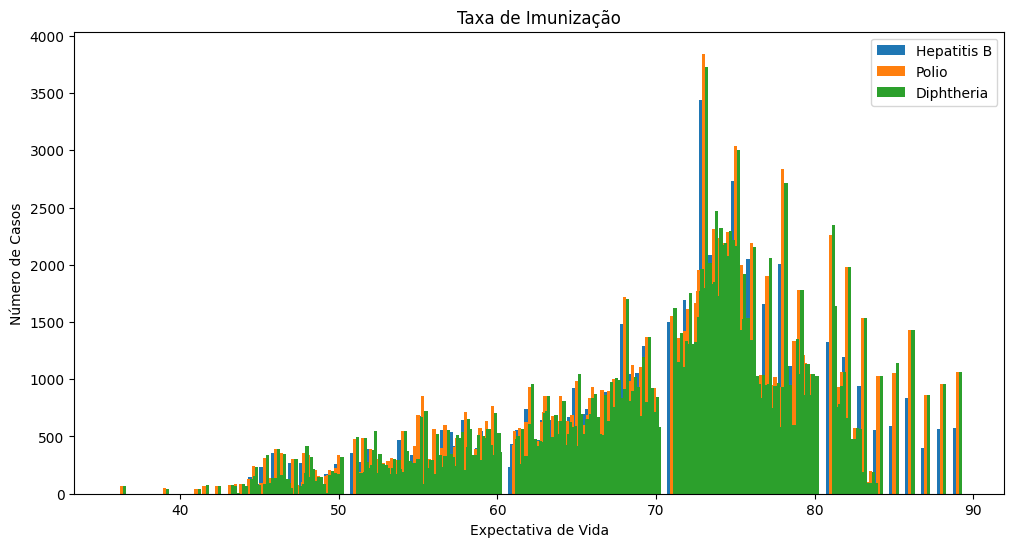

In [18]:
# Remova o espaço extra no nome da coluna 'Diphtheria '
df.columns = df.columns.str.strip()

# Agrupe a expectativa de vida e some as taxas de imunização
taxa_imunizacao = df.groupby('Life expectancy')[['Hepatitis B', 'Polio', 'Diphtheria']].sum()

# Ajuste o tamanho da figura
plt.figure(figsize=(12, 6))
bar_width = 0.2  # Ajuste a largura da barra conforme necessário

# Barras da Hepatitis B
plt.bar(taxa_imunizacao.index - bar_width, taxa_imunizacao['Hepatitis B'], width=bar_width, label='Hepatitis B')

# Barras da Polio
plt.bar(taxa_imunizacao.index, taxa_imunizacao['Polio'], width=bar_width, label='Polio')

# Barras da Diphtheria
plt.bar(taxa_imunizacao.index + bar_width, taxa_imunizacao['Diphtheria'], width=bar_width, label='Diphtheria')

plt.title('Taxa de Imunização')
plt.xlabel('Expectativa de Vida')
plt.ylabel('Número de Casos')
plt.legend()
plt.show()


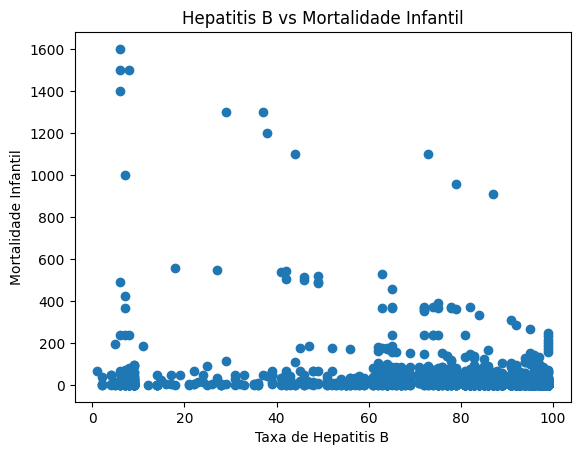

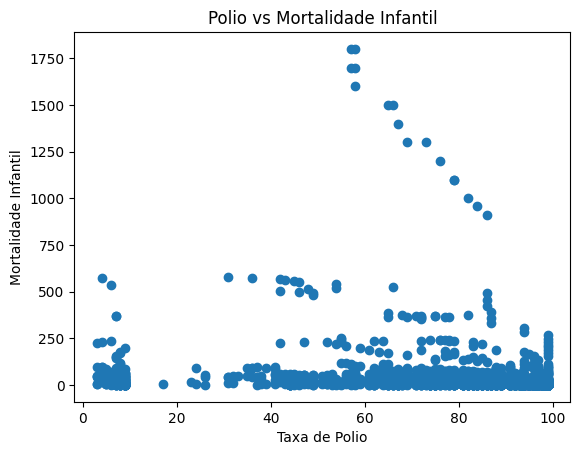

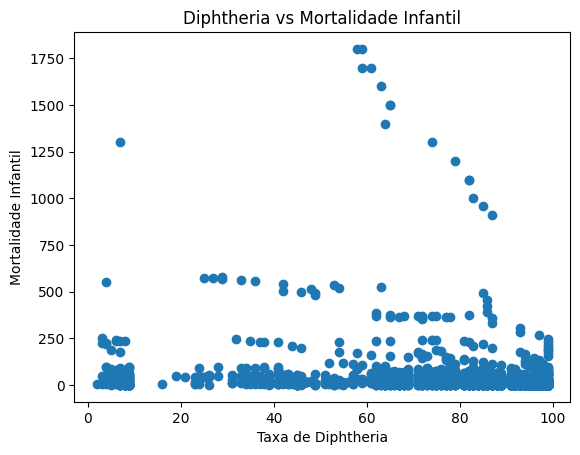

In [19]:
# Gráfico de dispersão para Hepatitis B vs Mortalidade Infantil
plt.scatter(df['Hepatitis B'], df['infant deaths'])
plt.title('Hepatitis B vs Mortalidade Infantil')
plt.xlabel('Taxa de Hepatitis B')
plt.ylabel('Mortalidade Infantil')
plt.show()

# Gráfico de dispersão para Polio vs Mortalidade Infantil
plt.scatter(df['Polio'], df['infant deaths'])
plt.title('Polio vs Mortalidade Infantil')
plt.xlabel('Taxa de Polio')
plt.ylabel('Mortalidade Infantil')
plt.show()

# Gráfico de dispersão para Diphtheria vs Mortalidade Infantil
plt.scatter(df['Diphtheria'], df['infant deaths'])
plt.title('Diphtheria vs Mortalidade Infantil')
plt.xlabel('Taxa de Diphtheria')
plt.ylabel('Mortalidade Infantil')
plt.show()


# Explore a relação entre despesas totais em saúde (Total expenditure) e expectativa de vida. Países que gastam mais em saúde tendem a ter expectativas de vida mais altas?

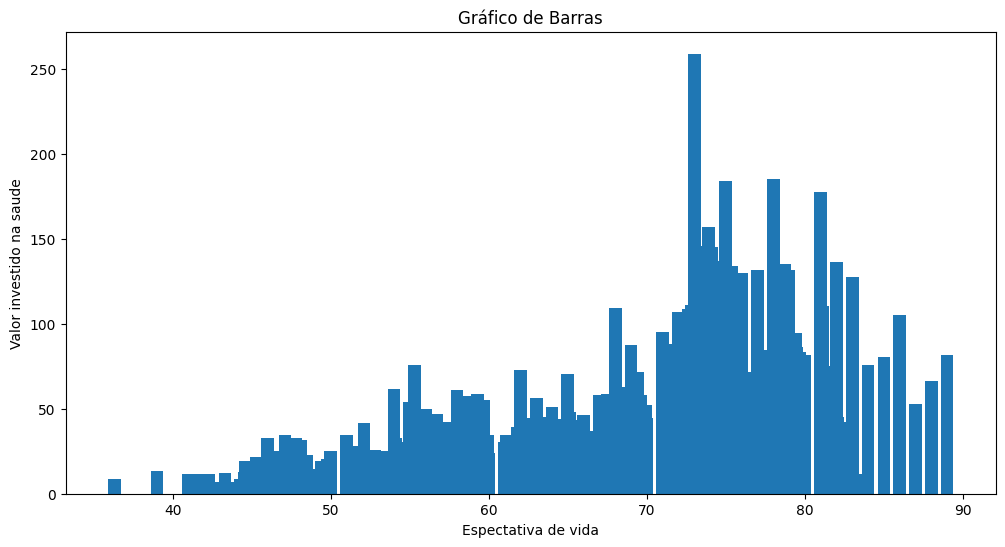

In [20]:
# Agrupo a espectativa de vida e somo o total de investimento na saúde
gastos_saude = df.groupby('Life expectancy')['Total expenditure'].sum()

#crio um Grafico
plt.figure(figsize=(12,6))
plt.bar(x=gastos_saude.index, height=gastos_saude.values)
plt.xlabel('Espectativa de vida')
plt.ylabel('Valor investido na saude')
plt.title('Gráfico de Barras')
plt.show()

Conclusão:<br>

SIM, como é possivel ver no grafico, paises que investe mais na saúde tendem a ter uma expectativa maior.<br>
O grafico tende diminir apartir dos 80 anos devido a idade avançada. Isso é um limite da regeneração das celular humanas, com o tempo perde força de gerar celular novas.

# Analise a relação entre o Produto Interno Bruto (GDP) e a expectativa de vida. Países com economias mais fortes têm expectativas de vida mais altas?

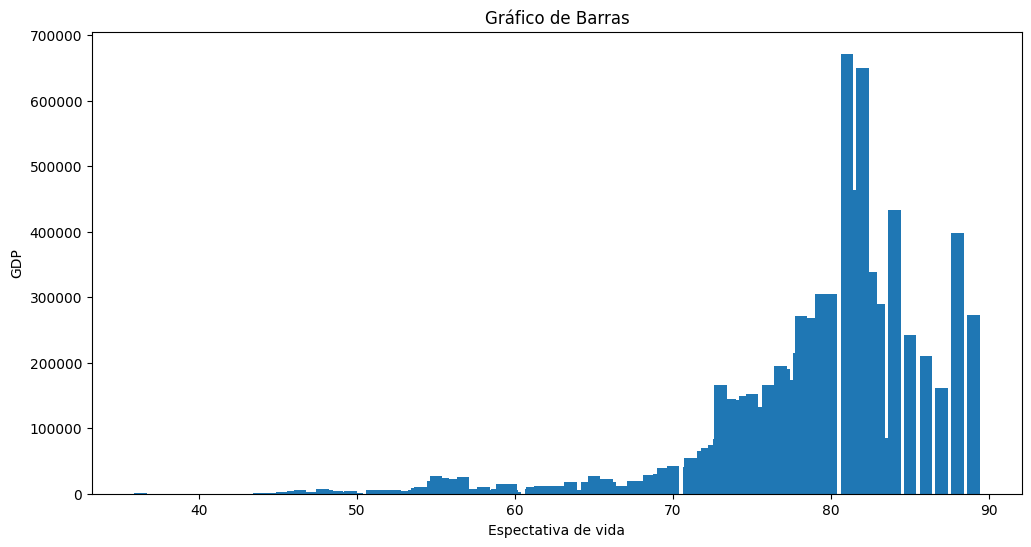

In [21]:
# Agrupando "Expectativa de vida e comando o PIB
GDP_vida = df.groupby('Life expectancy')['GDP'].sum()

#crio um Grafico
plt.figure(figsize=(12,6))
plt.bar(x=GDP_vida.index, height=GDP_vida.values)
plt.xlabel('Espectativa de vida')
plt.ylabel('GDP')
plt.title('Gráfico de Barras')
plt.show()

Conclusão:<br>

SIM, quanto maior o PIB(GDP) maior é a expectativa de vida.

# Qual é a media de investimento na saude de cada pais?

In [22]:
# Media global de quantos porcento(%) investe na saude
df['Total expenditure'].mean()

5.9301628423390085

In [23]:
# Media de quantos % cada pais investa na saude
df.groupby('Country')['Total expenditure'].mean()

Country
Afghanistan                           8.252500
Albania                               5.945625
Algeria                               4.604000
Angola                                3.919333
Antigua and Barbuda                   4.791333
                                        ...   
Venezuela (Bolivarian Republic of)    4.998667
Viet Nam                              5.977333
Yemen                                 5.005333
Zambia                                5.824000
Zimbabwe                              6.158667
Name: Total expenditure, Length: 183, dtype: float64

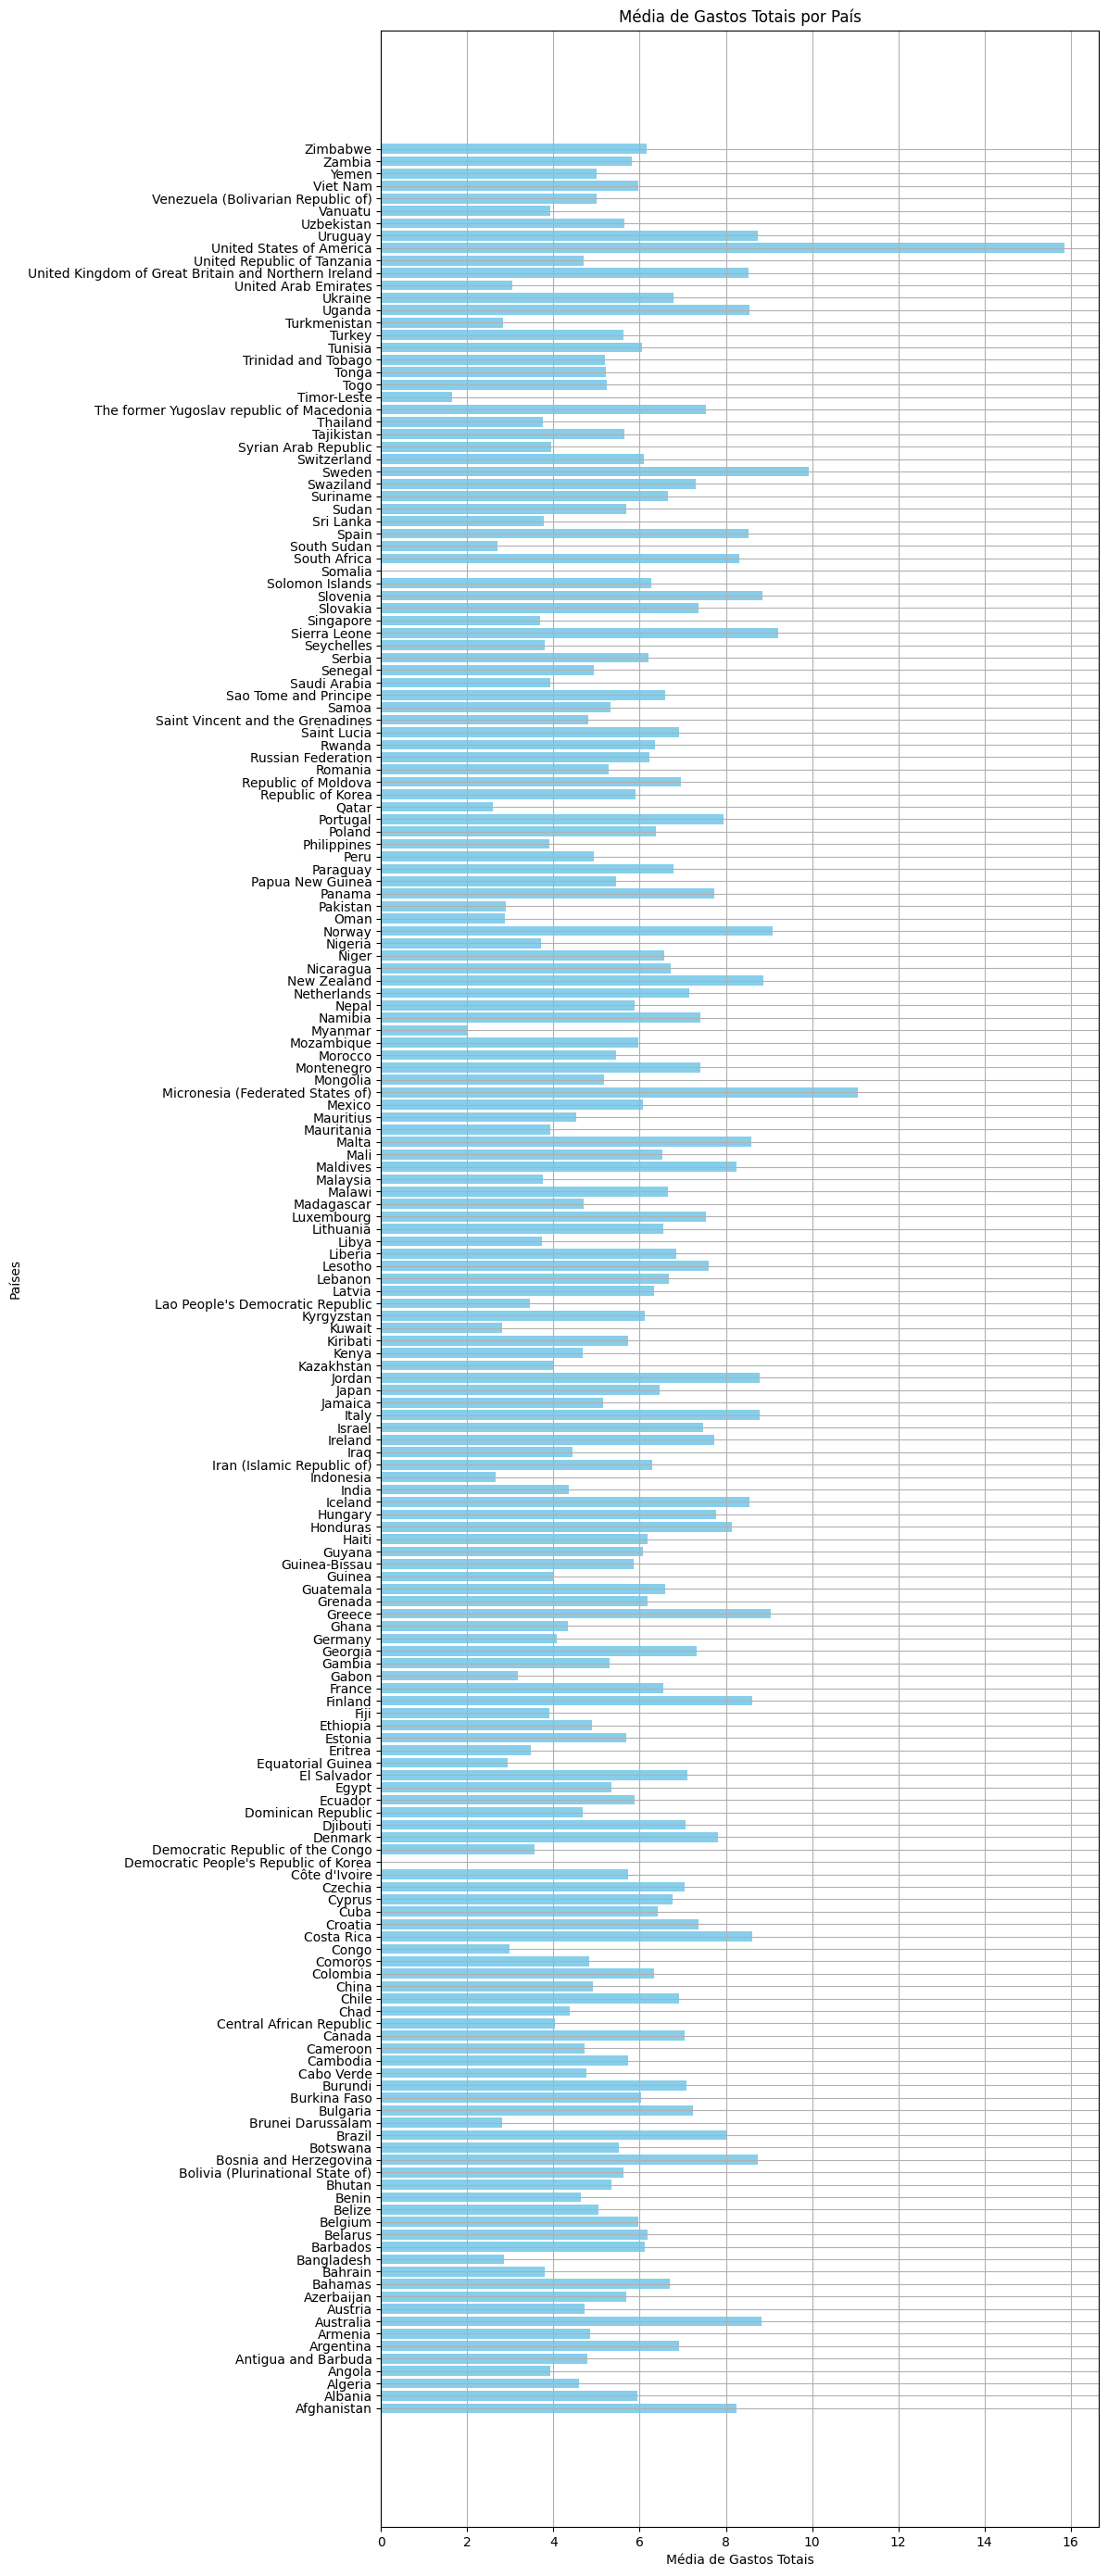

In [24]:
# Media de quantos % cada pais investa na saude e salvando na variavel
media_pais = df.groupby('Country')['Total expenditure'].mean()

# Ajuste o tamanho da figura
plt.figure(figsize=(10, 35))

# Barra horizontal para a média de gastos totais por país
plt.barh(media_pais.index, media_pais, color='skyblue')

plt.title('Média de Gastos Totais por País')
plt.xlabel('Média de Gastos Totais')
plt.ylabel('Países')

# Adicione uma grade ao gráfico
plt.grid(True)

plt.show()